In [1]:
# pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

100% 3.16G/3.17G [01:33<00:00, 44.9MB/s]
100% 3.17G/3.17G [01:33<00:00, 36.5MB/s]


In [5]:
# !unzip capital-alphabets-28x28.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasetSmall/validation/t/002691.png  
  inflating: datasetSmall/validation/t/002692.png  
  inflating: datasetSmall/validation/t/002693.png  
  inflating: datasetSmall/validation/t/002694.png  
  inflating: datasetSmall/validation/t/002695.png  
  inflating: datasetSmall/validation/t/002696.png  
  inflating: datasetSmall/validation/t/002697.png  
  inflating: datasetSmall/validation/t/002698.png  
  inflating: datasetSmall/validation/t/002699.png  
  inflating: datasetSmall/validation/t/002700.png  
  inflating: datasetSmall/validation/t/002701.png  
  inflating: datasetSmall/validation/t/002702.png  
  inflating: datasetSmall/validation/t/002703.png  
  inflating: datasetSmall/validation/t/002704.png  
  inflating: datasetSmall/validation/t/002705.png  
  inflating: datasetSmall/validation/t/002706.png  
  inflating: datasetSmall/validation/t/002707.png  
  inflating: datasetSmall/validation/t/002708.png  
  inflating: 

In [6]:
# !rm capital-alphabets-28x28.zip

In [7]:
# !rm -rf datasetSmall
# !rm -rf dataset

In [8]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt
import os

In [9]:
train_dir = "/content/datasetDigit/train"
val_dir = "/content/datasetDigit/validation"
test_dir = "/content/datasetDigit/test"

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                batch_size=64,
                                                                image_size=(256, 256),
                                                                label_mode="categorical",
                                                                seed=0)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              batch_size=64,
                                                              image_size=(256, 256),
                                                              label_mode="categorical",
                                                              seed=0)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              batch_size=64,
                                                              image_size=(256, 256),
                                                              label_mode="categorical",
                                                              seed=0,
                                                              shuffle=False)

Found 225173 files belonging to 10 classes.
Found 75062 files belonging to 10 classes.
Found 75010 files belonging to 10 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu', input_shape=[256, 256, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x=train_data, validation_data=val_data, epochs=5, steps_per_epoch=150, validation_steps=50)

Epoch 1/5
150/150 [==============================] - 58s 362ms/step - loss: 0.6765 - accuracy: 0.7914 - val_loss: 0.3590 - val_accuracy: 0.8884
Epoch 2/5
150/150 [==============================] - 53s 352ms/step - loss: 0.3126 - accuracy: 0.9017 - val_loss: 0.3226 - val_accuracy: 0.8975
Epoch 3/5
150/150 [==============================] - 53s 353ms/step - loss: 0.2845 - accuracy: 0.9086 - val_loss: 0.2740 - val_accuracy: 0.9116
Epoch 4/5
150/150 [==============================] - 53s 350ms/step - loss: 0.2601 - accuracy: 0.9161 - val_loss: 0.2644 - val_accuracy: 0.9169
Epoch 5/5
150/150 [==============================] - 53s 351ms/step - loss: 0.2435 - accuracy: 0.9196 - val_loss: 0.2416 - val_accuracy: 0.9181


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 60)      1680      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 60)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 60)      32460     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 60)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 60)       

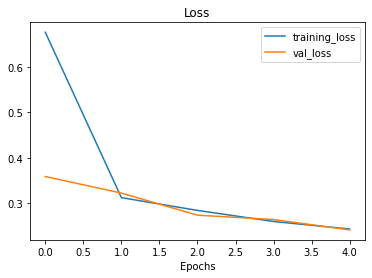

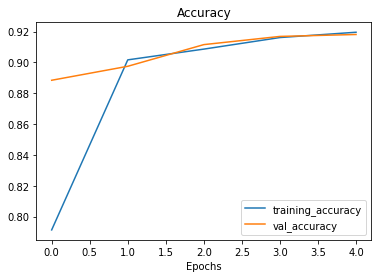

In [14]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

epochs = range(len(model_history.history['loss']))

#Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

#Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [15]:
test_loss, test_accuracy = model.evaluate(test_data)
test_loss, test_accuracy

1173/1173 [==============================] - 172s 147ms/step - loss: 0.2443 - accuracy: 0.9196


(0.24428057670593262, 0.9196107387542725)

In [16]:
pred_probs = model.predict(test_data, verbose=1)
print(len(pred_probs))
print(pred_probs.shape)
print(pred_probs[0])

1173/1173 [==============================] - 173s 147ms/step
75010
(75010, 10)
[9.9762851e-01 5.7520443e-05 7.1851886e-05 1.0719799e-05 6.1753337e-05
 3.4027638e-05 1.4849806e-03 1.1428151e-04 3.3882796e-04 1.9747393e-04]


In [17]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 10
What prediction probability sample 0 looks like:
 [9.9762851e-01 5.7520443e-05 7.1851886e-05 1.0719799e-05 6.1753337e-05
 3.4027638e-05 1.4849806e-03 1.1428151e-04 3.3882796e-04 1.9747393e-04]
The class with the highest predicted probability by the model for sample 0: 0


In [18]:
pred_classes = pred_probs.argmax(axis=1)
print(pred_classes[:10])

[0 0 0 0 0 0 0 0 0 0]


In [20]:
class_names = test_data.class_names
print(class_names[:10])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [21]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  img = tf.image.grayscale_to_rgb(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

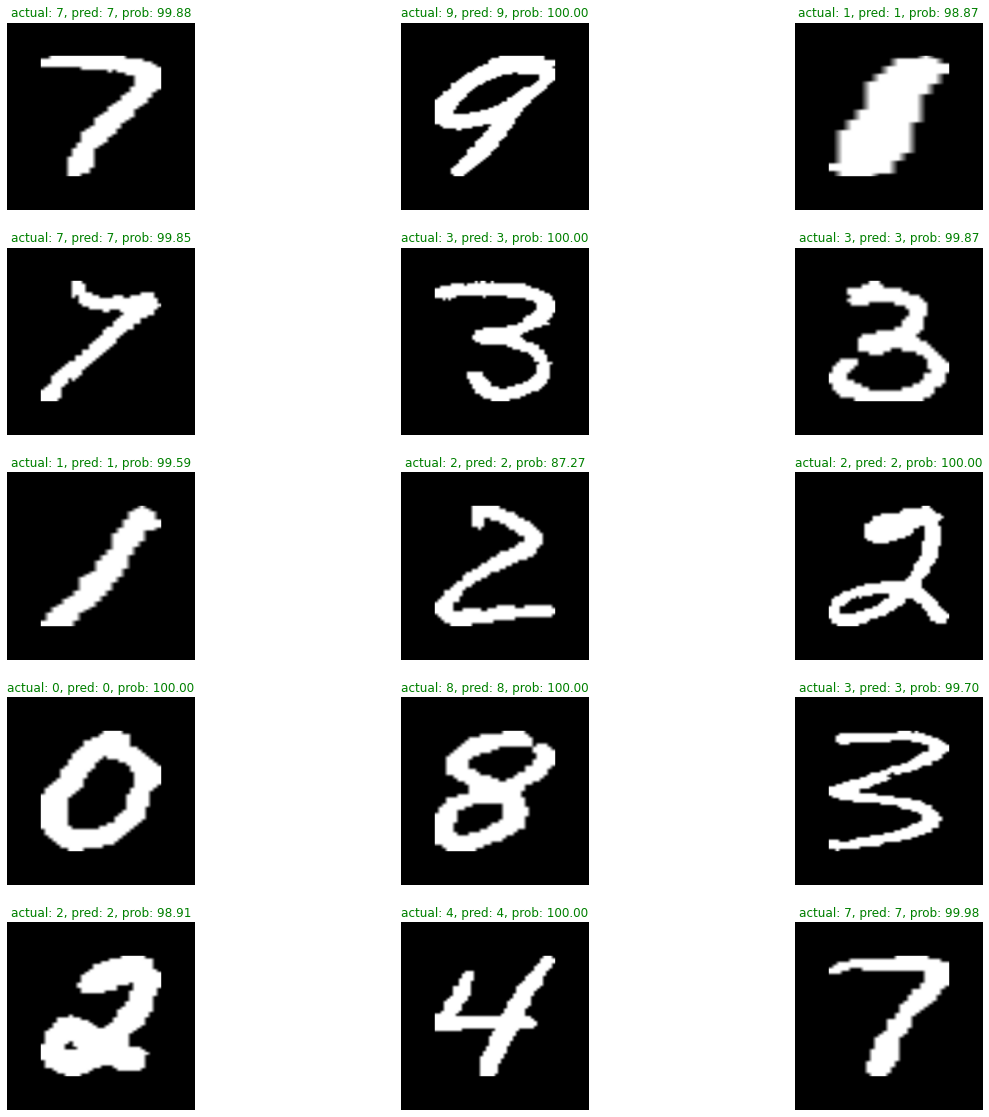

In [25]:
plt.figure(figsize=(20, 20))

for i in range(15):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + '/' + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(5, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max()*100:.2f}", c=title_color)
  plt.axis(False);

In [26]:
# model.save('OCR_Dataset2_Digit_Simple.h5')